## Exploratory Analysis and Data Visualization

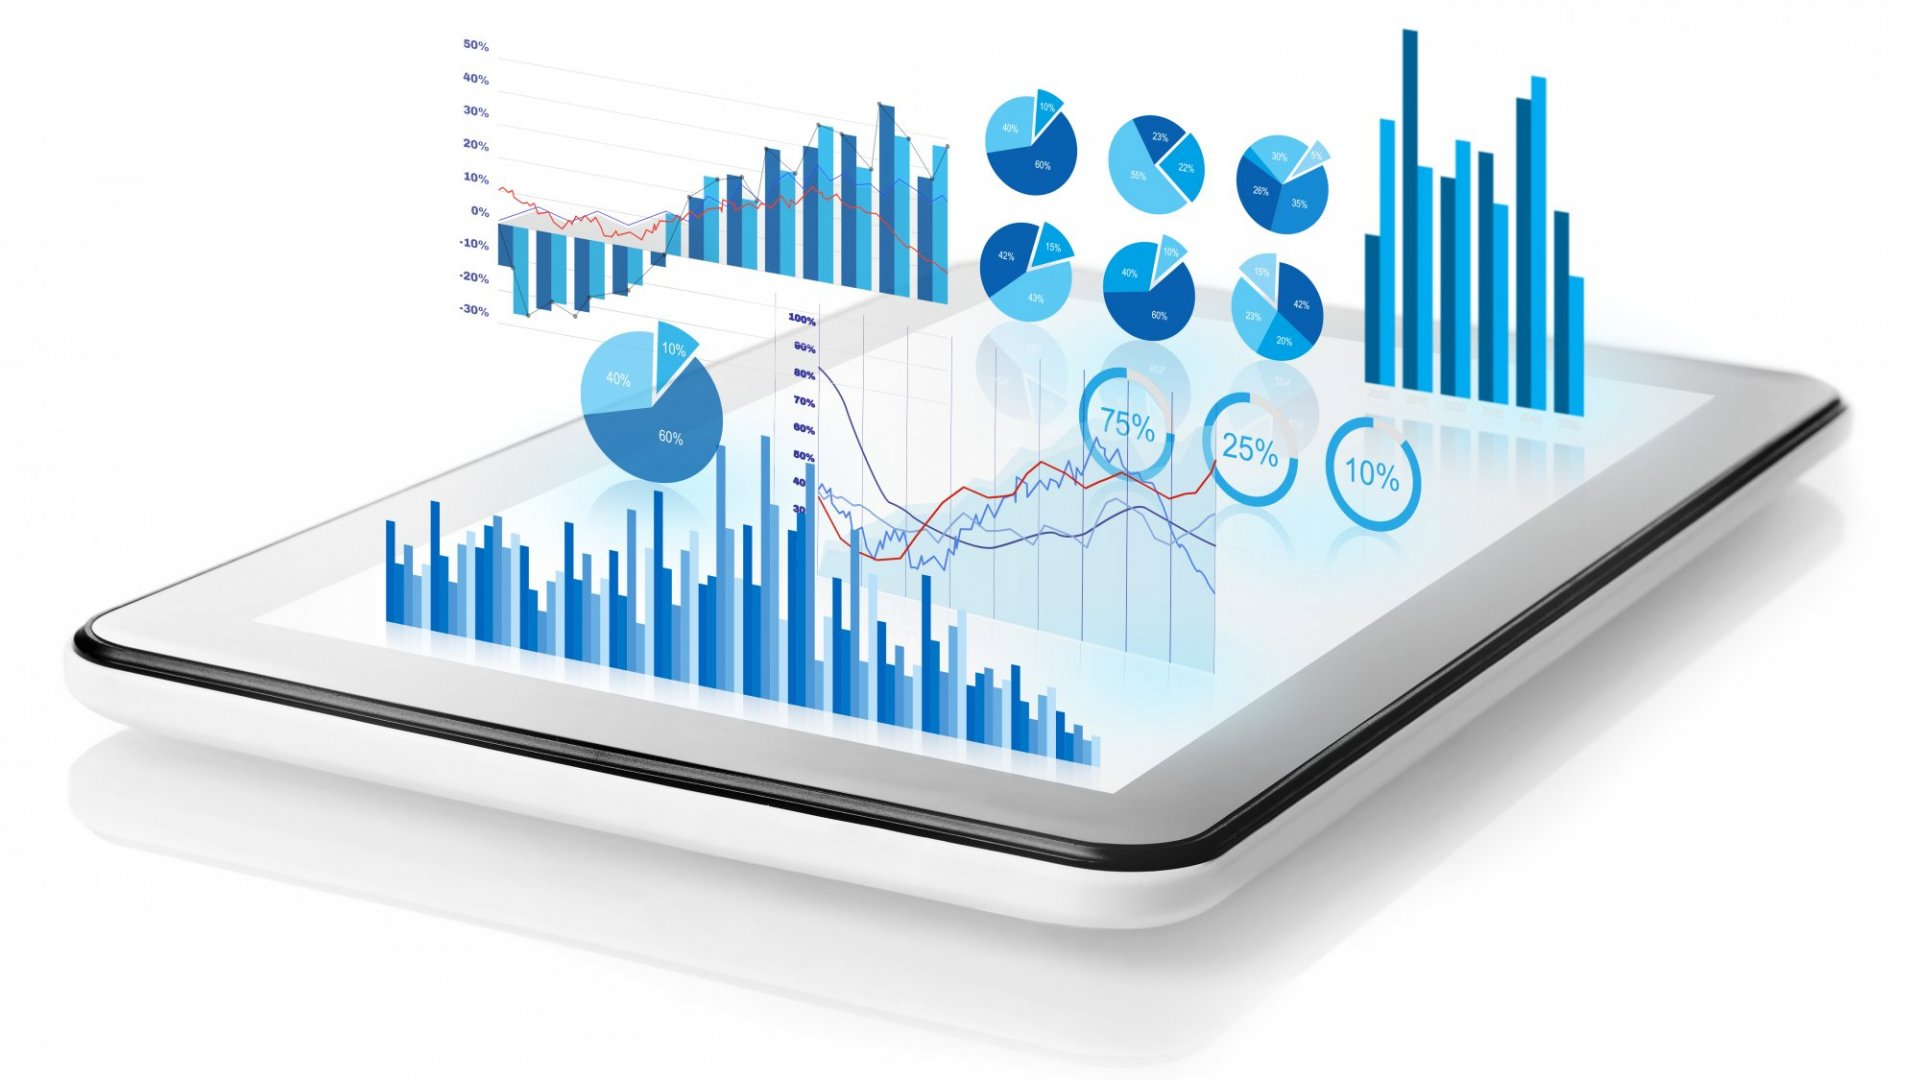

In [1]:
#@title Importing Libraries



import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Import Libraries")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    plt.style.use('ggplot')
    %matplotlib inline  
    from pandas.plotting import scatter_matrix
    print("Libraries Imported")

button.on_click(on_button_clicked)
display(button, output)

Button(description='Import Libraries', style=ButtonStyle())

Output()

### Exploratory Data Analysis:

In [2]:
#@title Load training data prepared previuosly
# Load training data prepared previuosly

import ipywidgets as widgets
from IPython.display import display
import pandas as pd
button = widgets.Button(description="Load training data")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    df_tr_lbl = pd.read_csv('train.csv')
    df_tr_lbl.head()
    print("Training data Loaded")

button.on_click(on_button_clicked)
display(button, output)

Button(description='Load training data', style=ButtonStyle())

Output()

In [3]:
#@title Exclude enging id and cycle number from the input features
#exclude enging id and cycle number from the input features:

featurs = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

<AxesSubplot: title={'center': 'Features Standard Deviation'}>

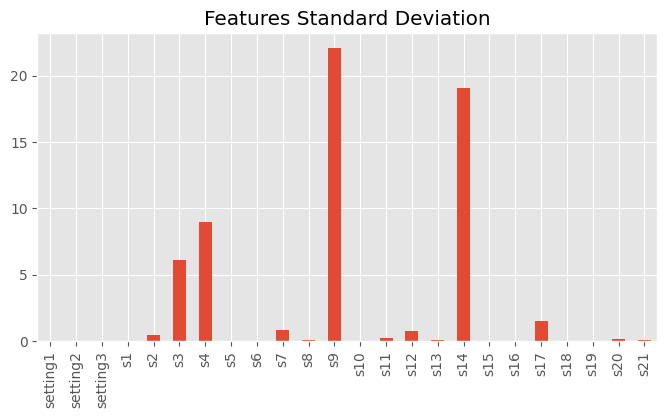

In [4]:
#@title Adjust to resize Feature Standard Deviation
#plot and compare the standard deviation of input features:


df_tr_lbl = pd.read_csv('train.csv')
Width = 8 #@param {type:"slider", min:0, max:100, step:1}
Height = 4 #@param {type:"slider", min:0, max:100, step:1}



df_tr_lbl[featurs].std().plot(kind='bar', figsize=(Width,Height), title="Features Standard Deviation")

<AxesSubplot: title={'center': 'Features Standard Deviation (log)'}>

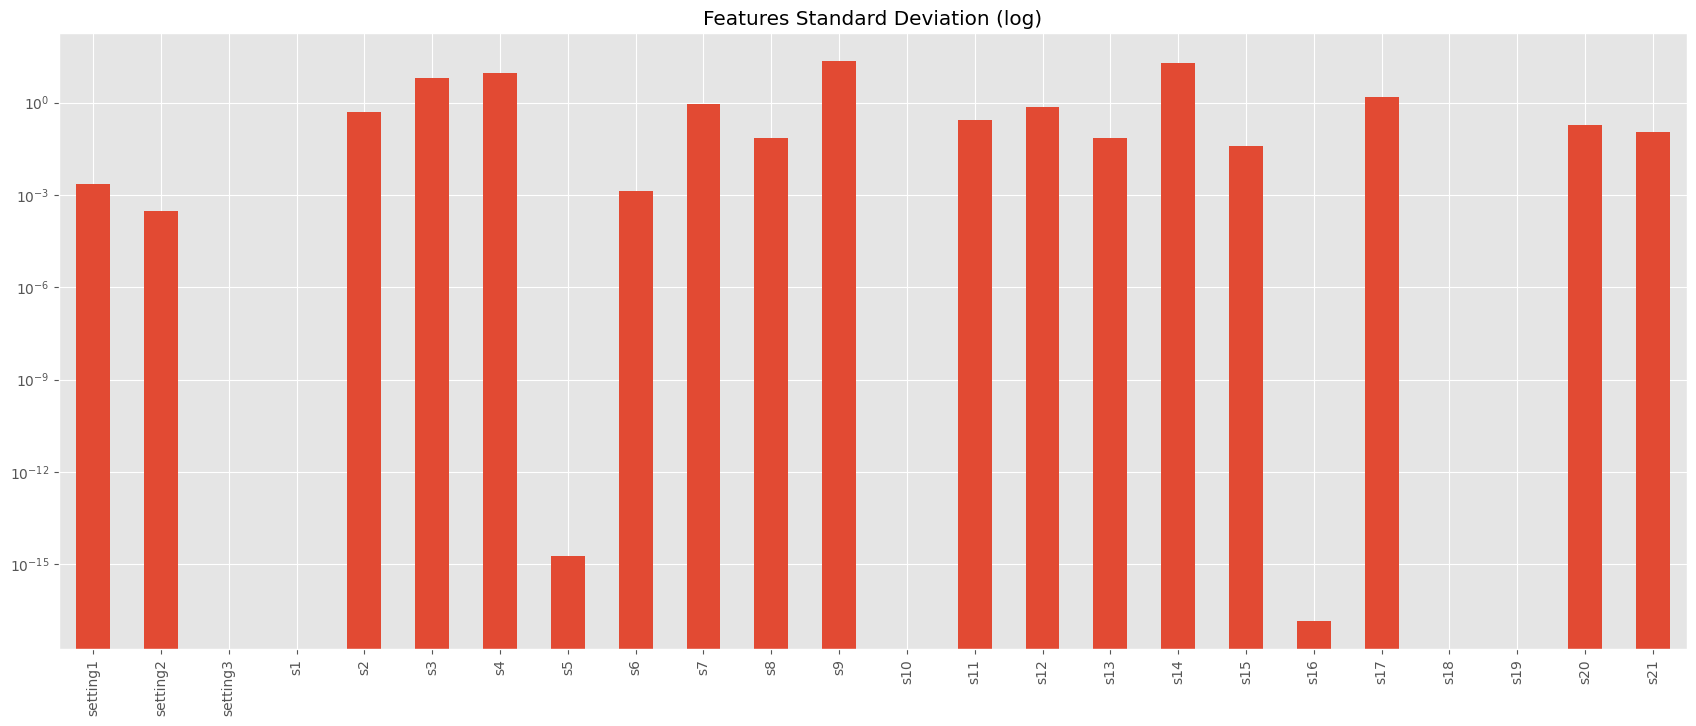

In [5]:
#@title Adjust to resize feature Standard Deviation on a log scale 
#plot and compare the standard deviation of input features:


df_tr_lbl = pd.read_csv('train.csv')
Width = 21 #@param {type:"slider", min:0, max:100, step:1}
Height = 8 #@param {type:"slider", min:0, max:100, step:1}



df_tr_lbl[featurs].std().plot(kind='bar', figsize=(Width,Height),logy=True, title="Features Standard Deviation (log)")

In [6]:
#@title Get ordered list of top variance features:
# get ordered list of top variance features:

featurs_top_var = df_tr_lbl[featurs].std().sort_values(ascending=False)
featurs_top_var

s9          2.208288e+01
s14         1.907618e+01
s4          9.000605e+00
s3          6.131150e+00
s17         1.548763e+00
s7          8.850923e-01
s12         7.375534e-01
s2          5.000533e-01
s11         2.670874e-01
s20         1.807464e-01
s21         1.082509e-01
s13         7.191892e-02
s8          7.098548e-02
s15         3.750504e-02
setting1    2.187313e-03
s6          1.388985e-03
setting2    2.930621e-04
s5          1.776400e-15
s16         1.387812e-17
s1          0.000000e+00
s18         0.000000e+00
s19         0.000000e+00
setting3    0.000000e+00
s10         0.000000e+00
dtype: float64

In [7]:
#@title Get ordered list features correlation with regression label ttf

# get ordered list features correlation with regression label ttf

df_tr_lbl[featurs].corrwith(df_tr_lbl.ttf).sort_values(ascending=False)

s12         6.719831e-01
s7          6.572227e-01
s21         6.356620e-01
s20         6.294285e-01
s16        -6.489765e-16
s5         -6.489765e-16
setting2   -1.947628e-03
setting1   -3.198458e-03
s6         -1.283484e-01
s14        -3.067689e-01
s9         -3.901016e-01
s13        -5.625688e-01
s8         -5.639684e-01
s3         -5.845204e-01
s17        -6.061536e-01
s2         -6.064840e-01
s15        -6.426670e-01
s4         -6.789482e-01
s11        -6.962281e-01
setting3             NaN
s1                   NaN
s10                  NaN
s18                  NaN
s19                  NaN
dtype: float64

In [8]:
#@title List of features having low or no correlation with regression label ttf and very low or no variance
# Load training data prepared previuosly

import ipywidgets as widgets
from IPython.display import display
import pandas as pd
button = widgets.Button(description="Get Stats!")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    low_cor_featrs = ['setting3', 's1', 's10', 's18','s19','s16','s5', 'setting2', 'setting1']
    df_tr_lbl[low_cor_featrs].describe()
    print(df_tr_lbl[low_cor_featrs].describe())

button.on_click(on_button_clicked)
display(button, output)

Button(description='Get Stats!', style=ButtonStyle())

Output()

In [9]:
#@title List of features having high correlation with regression label ttf


import ipywidgets as widgets
from IPython.display import display
import pandas as pd
button = widgets.Button(description="Get Stats!")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    correl_featurs = ['s12', 's7', 's21', 's20', 's6', 's14', 's9', 's13', 's8', 's3', 's17', 's2', 's15', 's4', 's11']
    df_tr_lbl[correl_featurs].describe()
    print(df_tr_lbl[correl_featurs].describe())

button.on_click(on_button_clicked)
display(button, output)

Button(description='Get Stats!', style=ButtonStyle())

Output()

['s12', 's7', 's21', 's20', 's6', 's14', 's9', 's13', 's8', 's3', 's17', 's2', 's15', 's4', 's11'] could be target for feature selection during modeling since their correlation with TTF is higher than other features.  

Let us disply this correlation in heatmap

In [10]:
#@title Add the regression label 'ttf' to the list of high corr features 
# add the regression label 'ttf' to the list of high corr features 
correl_featurs = ['s12', 's7', 's21', 's20', 's6', 's14', 's9', 's13', 's8', 's3', 's17', 's2', 's15', 's4', 's11']
correl_featurs_lbl = correl_featurs + ['ttf']

In [11]:
#@title Plot a heatmap to display +ve and -ve correlation among features and regression label:


import ipywidgets as widgets
from IPython.display import display
import pandas as pd
button = widgets.Button(description="Get Heatmap")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    import seaborn as sns
    import numpy as np
    import matplotlib.pyplot as plt
    cm = np.corrcoef(df_tr_lbl[correl_featurs_lbl].values.T)
    sns.set(font_scale=1.0)
    fig = plt.figure(figsize=(10, 8))
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=correl_featurs_lbl, xticklabels=correl_featurs_lbl)
    plt.title('Features Correlation Heatmap')
    plt.show()
    #print(df_tr_lbl[correl_featurs].describe())

button.on_click(on_button_clicked)
display(button, output)

Button(description='Get Heatmap', style=ButtonStyle())

Output()


There is a very high correlation (> 0.8) between some features: (s14, s9), (s11, s4), (s11, s7), (s11, s12), (s4, s12), (s8,s13),  (s7, s12)  
This may hurt the performance of some ML algorithms.  

So, some of the above features will be target for removal in feature selection

In [12]:
#@title Reset matplotlib original theme
#reset matplotlib original theme
import seaborn as sns
sns.reset_orig()

Button(description='Get Scatter Matrix', style=ButtonStyle())

Output()

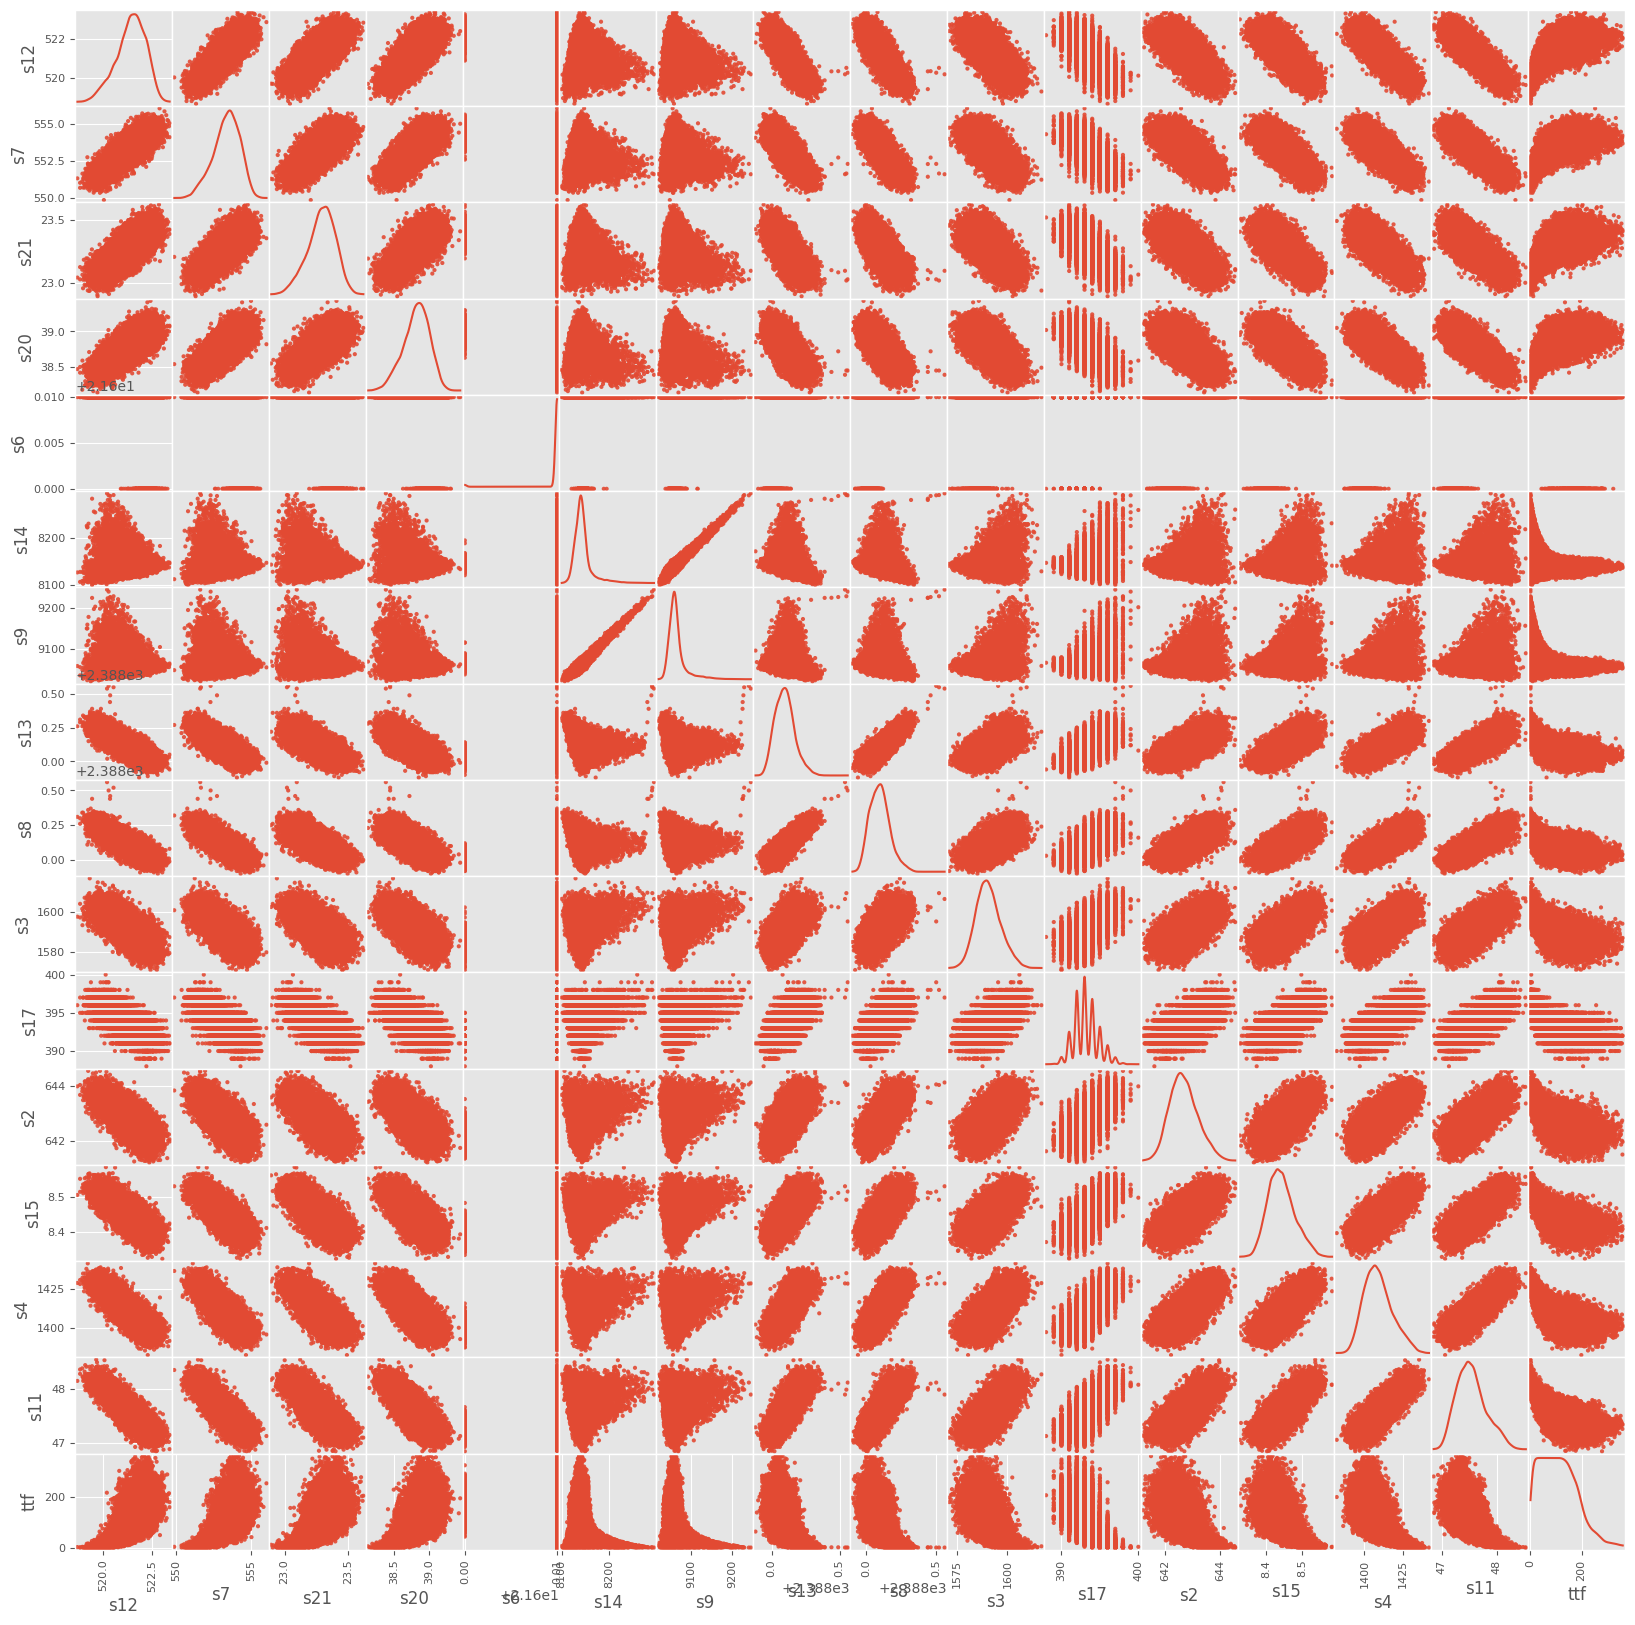

In [13]:
#@title Create scatter matrix to disply relatiohships and distribution among features and regression label

alpha = 0.9 #@param {type:"slider", min:0, max:1, step:0.1}
size = 20 #@param {type:"slider", min:0, max:100, step:1}

import ipywidgets as widgets
from IPython.display import display
import pandas as pd
button = widgets.Button(description="Get Scatter Matrix")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    from pandas.plotting import scatter_matrix
    scatter_matrix(df_tr_lbl[correl_featurs_lbl], alpha=alpha, figsize=(size, size), diagonal='kde')

button.on_click(on_button_clicked)
display(button, output)

Most of the features have normal distribution which has positve effect on machine learning algorithms.  

Most of the features have non-linear relationship with the regression label ttf, so using polynomial models may lead to better results.


Creating a helper function to ease exploration of each feature invidually:

In [14]:
#@title Create explore_col function

def explore_col(s, e):
    
    """Plot 4 main graphs for a single feature.
    
        plot1: histogram 
        plot2: boxplot 
        plot3: line plot (time series over cycle)
        plot4: scatter plot vs. regression label ttf
        
    Args:
        s (str): The column name of the feature to be plotted.
        e (int): The number of random engines to be plotted for plot 3. Range from 1 -100, 0:all engines, >100: all engines.

    Returns:
        plots
    
    """
    
    fig = plt.figure(figsize=(10, 8))


    sub1 = fig.add_subplot(221) 
    sub1.set_title(s +' histogram') 
    sub1.hist(df_tr_lbl[s])

    sub2 = fig.add_subplot(222)
    sub2.set_title(s +' boxplot')
    sub2.boxplot(df_tr_lbl[s])
    
    #np.random.seed(12345)
    
    if e > 100 or e <= 0:
        select_engines = list(pd.unique(df_tr_lbl.id))
    else:
        select_engines = np.random.choice(range(1,101), e, replace=False)
        
    sub3 = fig.add_subplot(223)
    sub3.set_title('time series: ' + s +' / cycle')
    sub3.set_xlabel('cycle')
    for i in select_engines:
        df = df_tr_lbl[['cycle', s]][df_tr_lbl.id == i]
        sub3.plot(df['cycle'],df[s])
    
    sub4 = fig.add_subplot(224)
    sub4.set_title("scatter: "+ s + " / ttf (regr label)")
    sub4.set_xlabel('ttf')
    sub4.scatter(df_tr_lbl['ttf'],df_tr_lbl[s])


    plt.tight_layout()
    plt.show()

# Let's visualize each feature individually, in terms of Histogram, Box plot, Time series and Scatter Plot

In [15]:
#@title Visualizing each feature individually

Feature = 's7' #@param ["s1", "s2", "s3","s4","s5","s6","s7","s8","s9","s10","s11","s12","s13","s14","s15","s16","s17","s18","s19","s20","s21"]


size = 17 #@param {type:"slider", min:0, max:100, step:1}

import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
button = widgets.Button(description="Visualize features")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    explore_col(Feature, size)
    

button.on_click(on_button_clicked)
display(button, output)

Button(description='Visualize features', style=ButtonStyle())

Output()

In [16]:
#@title Create a function to explore the time series plot each sensor selecting random sample engines
# Create a function to explore the time series plot each sensor selecting random sample engines

def plot_time_series(s):
    
    """Plot time series of a single sensor for 10 random sample engines.
    
        Args:
        s (str): The column name of the sensor to be plotted.

    Returns:
        plots
        
    """
    
    fig, axes = plt.subplots(10, 1, sharex=True, figsize = (15, 15))
    fig.suptitle(s + ' time series / cycle', fontsize=15)
    
    #np.random.seed(12345)
    select_engines = np.random.choice(range(1,101), 10, replace=False).tolist()
    
    for e_id in select_engines:
        df = df_tr_lbl[['cycle', s]][df_tr_lbl.id == e_id]
        i = select_engines.index(e_id)
        axes[i].plot(df['cycle'],df[s])
        axes[i].set_ylabel('engine ' + str(e_id))
        axes[i].set_xlabel('cycle')
        #axes[i].set_title('engine ' + str(e_id), loc='right')

    #plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()




In [17]:
#@title Time series plot

Feature = 's9' #@param ["s1", "s2", "s3","s4","s5","s6","s7","s8","s9","s10","s11","s12","s13","s14","s15","s16","s17","s18","s19","s20","s21"]

import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
button = widgets.Button(description="Time series")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    plot_time_series(Feature)

    

button.on_click(on_button_clicked)
display(button, output)

Button(description='Time series', style=ButtonStyle())

Output()

#### Let us check some stat on the classifcation labels:

In [18]:
#@title Print stat for binary classification label


import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Get Stat!")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    print(df_tr_lbl['label_bnc'].value_counts())
    print('\nNegaitve samples =  {0:.0%}'.format(df_tr_lbl['label_bnc'].value_counts()[0]/df_tr_lbl['label_bnc'].count()))
    print('\nPosiitve samples =  {0:.0%}'.format(df_tr_lbl['label_bnc'].value_counts()[1]/df_tr_lbl['label_bnc'].count()))


    

button.on_click(on_button_clicked)
display(button, output)

Button(description='Get Stat!', style=ButtonStyle())

Output()

This is clearly unbalanced dataset, so we should not depend on classification Accuracy as a model performance metric. We can use AUC ROC instead.

In [19]:
#@title Print stat for multiclass classification label


import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Get Stat!")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    print(df_tr_lbl['label_mcc'].value_counts())
    print('\nClass 0 samples =  {0:.0%}'.format(df_tr_lbl['label_mcc'].value_counts()[0]/df_tr_lbl['label_mcc'].count()))
    print('\nClass 1 samples =  {0:.0%}'.format(df_tr_lbl['label_mcc'].value_counts()[1]/df_tr_lbl['label_mcc'].count()))
    print('\nClass 2 samples =  {0:.0%}'.format(df_tr_lbl['label_mcc'].value_counts()[2]/df_tr_lbl['label_mcc'].count()))

button.on_click(on_button_clicked)
display(button, output)

Button(description='Get Stat!', style=ButtonStyle())

Output()

# Conclusion

### Exploratory Data Analysis Summary:

-  There is a very high correlation (> 0.8) between some features e.g.(s14 & s9), (s11 & s4), (s11 & s7), (s11 & s12), (s4 & s12), (s8 & s13), (s7 & s12). This multicollinearity may hurt the performance of some machine learning algorithms. So, part of these features will be target for elimination in feature selection during the modeling phase.  
-  Most features have nonlinear relation with the TTF, hence adding their polynomial transforms may enhance models performance.
-  Most features exhibit normal distribution which is likely improves models performance. 

